<a href="https://colab.research.google.com/github/RodrigoOBC/Notebook_MarcineLearning/blob/master/RedeNeuralReconhecendoNumeros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn, optim
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms

In [15]:
args = {
    'batch_size': 5,
    'num_workers': 4,
    'num_classes': 10,
    'lr': 1e-4,
    'weight_decay': 5e-4,
    'num_epochs': 10
}

In [16]:
if torch.cuda.is_available():
  args['device'] = torch.device('cuda')
else:
  args['device'] = torch.device('cpu')

args['device']

device(type='cuda')

In [18]:
tarin_df = datasets.MNIST('./',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True
                          )
test_df = datasets.MNIST('./',
                          train=False,
                          transform=transforms.ToTensor(),
                          download=True
                          )

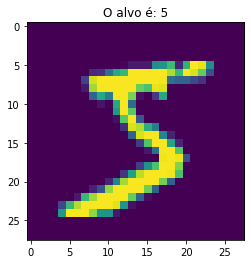

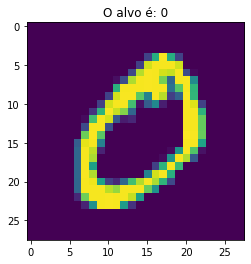

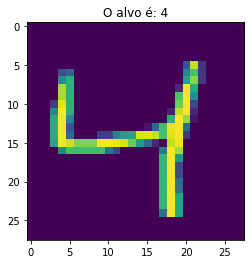

In [19]:
for x in range(0,3):
  valor, target = tarin_df[x]

  plt.figure()
  plt.imshow(valor[0])
  plt.title(f'O alvo é: {target}')

In [20]:
loader_train = DataLoader(tarin_df,
                          batch_size=args['batch_size'],
                          shuffle=True,
                          num_workers=args['num_workers']) 
learder_test = DataLoader(test_df,
                          batch_size=args['batch_size'],
                          shuffle=True,
                          num_workers=args['num_workers']) 

In [21]:
class classificador_de_numeros(nn.Module):

  def __init__(self, input_size, hidden_size, out_size):
    super(classificador_de_numeros, self).__init__()

    self.features  = nn.Sequential(
                      nn.Linear(input_size, hidden_size),
                      nn.ReLU(),
                      nn.Linear(hidden_size, hidden_size),
                      nn.ReLU()
                    )
    self.out     = nn.Linear(hidden_size, out_size)
    self.softmax = nn.Softmax()

  def forward(self, X):
    
    X = X.view(X.size(0), -1)

    feature = self.features(X)
    output  = self.softmax(self.out(feature))


    return output

In [22]:
input_size = 28*28
hiden_size = 128
out_size = 10

In [23]:
rede_neural = classificador_de_numeros(input_size,hiden_size,out_size).to(args['device'])

In [24]:
criterio = nn.CrossEntropyLoss().to(args['device'])
opitimize = optim.Adam(rede_neural.parameters(),lr=args['lr'],weight_decay=args['weight_decay'])

In [25]:
for epoca in range(args['num_epochs']):

  epoca_loss = []
  for batch in loader_train:
    
    dado, rotulo = batch

    # Cast na GPU
    dado   = dado.to(args['device'])
    rotulo = rotulo.to(args['device'])

    # Forward 
    pred = rede_neural(dado)
    loss = criterio(pred, rotulo)
    epoca_loss.append(loss.cpu().data)

    # Backward
    loss.backward()
    opitimize.step()

  epoca_loss = np.asarray(epoca_loss)
  print(f'Epoca: {epoca}  |  Perda: {epoca_loss.mean():.2f}  +/- {epoca_loss.std():.2f}')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoca: 0  |  Perda: 1.85  +/- 0.23
Epoca: 1  |  Perda: 2.08  +/- 0.23
Epoca: 2  |  Perda: 2.22  +/- 0.19
Epoca: 3  |  Perda: 2.20  +/- 0.20
Epoca: 4  |  Perda: 2.25  +/- 0.18
Epoca: 5  |  Perda: 2.32  +/- 0.16
Epoca: 6  |  Perda: 2.34  +/- 0.14
Epoca: 7  |  Perda: 2.30  +/- 0.16
Epoca: 8  |  Perda: 2.28  +/- 0.17
Epoca: 9  |  Perda: 2.26  +/- 0.18


Perda: 0.13
